<a href="https://colab.research.google.com/github/game-sys/IADS_Transfer_Learning/blob/main/1_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries
![https://keras.io/img/logo.png](https://keras.io/img/logo-small.png)

<font size="5">import important libraries used for **Computer Vision** and **Deeplearning**</font>

In [ ]:
# models
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
import tensorflow
from keras.applications import MobileNet
from keras.applications import ResNet50
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from keras.callbacks import ModelCheckpoint, EarlyStopping
import sklearn.metrics as metrics
import random
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint, TensorBoard

In [ ]:

os.environ['KAGGLE_USERNAME'] = "mohsin525" # username from the json file
os.environ['KAGGLE_KEY'] = "???" # key from the json file
!kaggle competitions download -c dogs-vs-cats # api copied from kaggle (https://www.kaggle.com/c/dogs-vs-cats/data)

100% 812M/812M [00:21<00:00, 40.4MB/s]
100% 812M/812M [00:21<00:00, 39.6MB/s]


In [ ]:
from zipfile import ZipFile
file_name = "/content/dogs-vs-cats.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('All Files Extracted !')





All Files Extracted !


In [ ]:
from zipfile import ZipFile
file_name = "/content/train.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('All Files Extracted !')


All Files Extracted !


In [ ]:
# Get all the paths
data_dir_list = os.listdir('/content/train')
#print(data_dir_list)
path, dirs, files = next(os.walk("/content/train"))
file_count = len(files)
print(file_count)

25000


In [ ]:
import os
import shutil
data_dir = '/content/'
categories = ['cat', 'dog']


for category in categories:
    category_dir = os.path.join(data_dir, category)
    print(category_dir)
    os.makedirs(category_dir, exist_ok=True)

/content/cat
/content/dog


In [ ]:
data_dir = '/content/'
train_dir = '/content/train'
count=0
for category in categories:
    category_dir = os.path.join(data_dir, category)
    label = categories.index(category)

    for img_file in os.listdir(train_dir):
        if img_file.startswith(category):
          src_path = os.path.join(train_dir, img_file)
          dst_path = os.path.join(category_dir, img_file)
          if not os.path.exists(dst_path):
              shutil.copy(src_path, dst_path)
              count+=1
        else:
          print(f"File '{img_file}' already exists in folder. Skipping.")

print(f'Copied {count} files')

Streaming output truncated to the last 5000 lines.
File 'cat.7914.jpg' already exists in 'dog' folder. Skipping.
File 'cat.10983.jpg' already exists in 'dog' folder. Skipping.
File 'cat.9284.jpg' already exists in 'dog' folder. Skipping.
File 'cat.1045.jpg' already exists in 'dog' folder. Skipping.
File 'cat.5310.jpg' already exists in 'dog' folder. Skipping.
File 'cat.6151.jpg' already exists in 'dog' folder. Skipping.
File 'cat.11703.jpg' already exists in 'dog' folder. Skipping.
File 'cat.8258.jpg' already exists in 'dog' folder. Skipping.
File 'cat.4074.jpg' already exists in 'dog' folder. Skipping.
File 'cat.12491.jpg' already exists in 'dog' folder. Skipping.
File 'cat.5193.jpg' already exists in 'dog' folder. Skipping.
File 'cat.10939.jpg' already exists in 'dog' folder. Skipping.
File 'cat.10761.jpg' already exists in 'dog' folder. Skipping.
File 'cat.3942.jpg' already exists in 'dog' folder. Skipping.
File 'cat.5371.jpg' already exists in 'dog' folder. Skipping.
File 'cat.9103

In [ ]:
path, dirs, files = next(os.walk("/content/cat"))
file_count = len(files)
print(file_count)

path, dirs, files = next(os.walk("/content/dog"))
file_count = len(files)
print(file_count)

12500
12500


# Spliting Data
![](https://files.realpython.com/media/Splitting-Datasets-With-sklearns-train_test_split_Watermarked.e321471660be.jpg)
<font size="4">
* Data is needed to be split into **Test**, **Train** and **Validation**
* **20** percent of data named as **X_test** and **Y_test** is extracted from whole data which will only used for testing purpose
* **70** percent of data named as **X_train** and **Y_train** is extracted from data to train Deeplearning model
* Similarly **10** percent of data will be used for validation named as **X_val** and **Y_val**. </font>

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

data_dir = '/content/'
categories = ['cat', 'dog']
IMG_SIZE=80
image_size = (IMG_SIZE, IMG_SIZE)  # Set the desired image size (width, height).

images = []
labels = []

# Load the images and labels
for category in categories:
    category_dir = os.path.join(data_dir, category)
    label = categories.index(category)

    for img_file in os.listdir(category_dir):
        img_path = os.path.join(category_dir, img_file)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        img = cv2.resize(img, image_size)
        images.append(img)
        labels.append(label)

# Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Perform data splitting: 70% train, 20% test, 10% validation
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

# Print the shapes of the datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("X_val shape:", X_val.shape)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("y_val shape:", y_val.shape)


X_train shape: (17500, 80, 80, 3)
X_test shape: (5025, 80, 80, 3)
X_val shape: (2475, 80, 80, 3)
y_train shape: (17500,)
y_test shape: (5025,)
y_val shape: (2475,)


So, we need to tranform these images

Question- Why we resize image to 80 x 80?


# One Hot Encoding

<font size="4"> As neural network cannot work with categorical data directly so data is needed to be transform in more expressive representation </font>



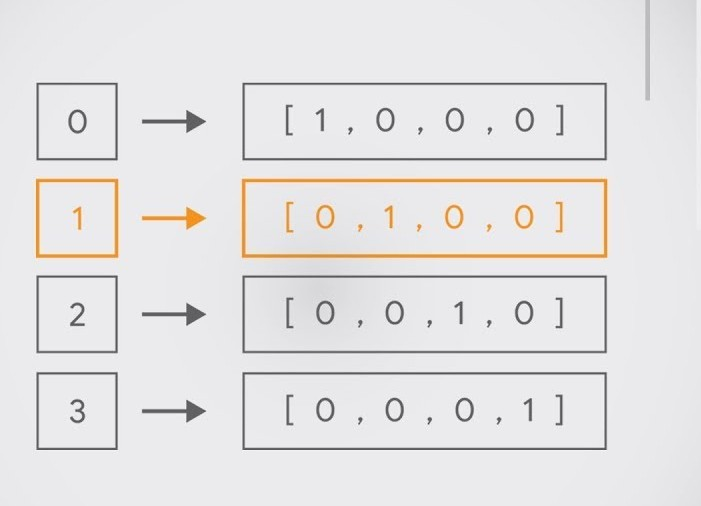

In [ ]:
# One-hot encode the labels
num_classes = 2  # For binary classification (cat and dog).
y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)
y_val_one_hot = to_categorical(y_val, num_classes)

# Defineing a Model
![](https://wp.wwu.edu/machinelearning/files/2017/02/dnn-28vmlum.png)


<font size="4"> Next step is to define a model </font>


In [ ]:
def ResNET50():
    print("Loading ResNet50 Model...")
    model = Sequential()
    model.add(ResNet50(include_top=False,weights=None, pooling='avg', input_shape=(80,80,3)))
    #model.add(Flatten())
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
    model.summary()
    return model

# Train a model
<font size="4"> To **train** the model for a fixed number of epochs we need to call the **Fit** function </font>

In [ ]:
import matplotlib.pyplot as plt
model=ResNET50()

# Define the paths for saving the model and TensorBoard logs
model_name = "ResNet50_CatvsDog"
model_dir = "models"
tensorboard_logs = "logs"

print("Starting Training... ")



# Train the model using the one-hot encoded labels and store the history
history = model.fit(X_train, y_train_one_hot, epochs=5, batch_size=128, validation_data=(X_val, y_val_one_hot),
                    callbacks=[ModelCheckpoint(os.path.join(model_dir, model_name + ".h5"),
                                               save_best_only=True)])





Loading ResNet50 Model...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 2)                 4098      
                                                                 
Total params: 23,591,810
Trainable params: 23,538,690
Non-trainable params: 53,120
_________________________________________________________________
Starting Training... 
Epoch 1/5
137/137 [==============================] - 62s 232ms/step - loss: 1.5718 - accuracy: 0.5159 - val_loss: 0.7283 - val_accuracy: 0.5067
Epoch 2/5
137/137 [==============================] - 28s 204ms/step - loss: 0.8494 - accuracy: 0.5552 - val_loss: 0.6834 - val_accuracy: 0.5362
Epoch 3/5
137/137 [==============================] - 28s 204ms/step - loss: 0.7810 - accuracy: 0.59

# Plot Accuracy and Loss
<font size="4"> To **train** the model for a fixed number of epochs we need to call the **Fit** function </font>

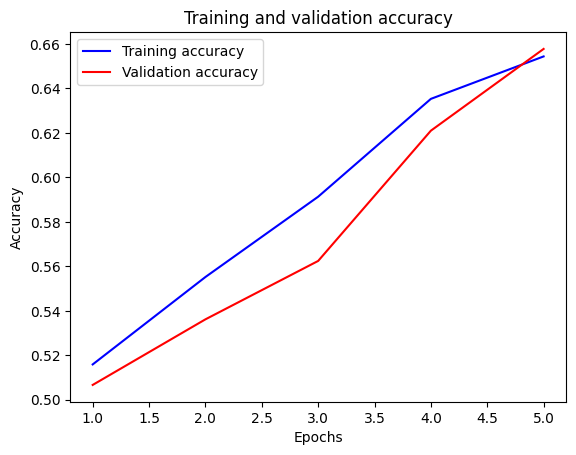

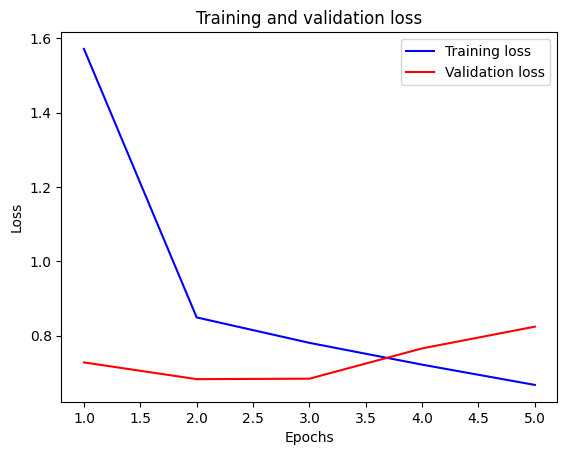

In [ ]:
# Plot training and validation accuracy on the same plot
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss on the same plot
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate a model
<font size="4"> To **evaluate** the model on **Test** data we will evaluate the model using **Evaluate** function from **Keras**  </font>

In [ ]:
from keras.models import load_model

# Load the saved model
saved_model_path = "models/ResNet50_CatvsDog.h5"
loaded_model = load_model(saved_model_path)

# Evaluate the model on the test data
loss, accuracy = loaded_model.evaluate(X_test, y_test_one_hot, batch_size=128)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

40/40 [==============================] - 4s 71ms/step - loss: 0.6895 - accuracy: 0.5206
Test Loss: 0.6895349621772766
Test Accuracy: 0.5205970406532288




---



# Loading MobileNet


In [ ]:
def MobileNet_model():
    print("Loading MobileNet Model...")
    model = Sequential()
    model.add(MobileNet(include_top=False,weights=None, pooling='avg', input_shape=(80,80,3)))
    #model.add(Flatten())
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy'])
    model.summary()
    return model

In [ ]:
model=MobileNet_model()

Loading MobileNet Model...
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_80 (Function  (None, 1024)             3228864   
 al)                                                             
                                                                 
 dense_1 (Dense)             (None, 2)                 2050      
                                                                 
Total params: 3,230,914
Trainable params: 3,209,026
Non-trainable params: 21,888
_________________________________________________________________


In [ ]:

# Define the paths for saving the model and TensorBoard logs
model_name = "MobileNet_CatvsDog"
model_dir = "models"
tensorboard_logs = "logs"

print("Starting Training... ")

# Train the model using the one-hot encoded labels
history = model.fit(X_train, y_train_one_hot, epochs=5, batch_size=128, validation_data=(X_val, y_val_one_hot),
                    callbacks=[ModelCheckpoint(os.path.join(model_dir, model_name + ".h5"),
                                               save_best_only=True,
                                               )])


Starting Training... 
Epoch 1/5
137/137 [==============================] - 29s 89ms/step - loss: 0.7302 - accuracy: 0.5713 - val_loss: 0.7055 - val_accuracy: 0.5063
Epoch 2/5
137/137 [==============================] - 10s 75ms/step - loss: 0.6333 - accuracy: 0.6480 - val_loss: 0.6950 - val_accuracy: 0.4937
Epoch 3/5
137/137 [==============================] - 10s 74ms/step - loss: 0.5938 - accuracy: 0.6811 - val_loss: 0.6935 - val_accuracy: 0.5063
Epoch 4/5
137/137 [==============================] - 10s 74ms/step - loss: 0.5540 - accuracy: 0.7128 - val_loss: 0.6921 - val_accuracy: 0.5063
Epoch 5/5
137/137 [==============================] - 10s 76ms/step - loss: 0.5101 - accuracy: 0.7447 - val_loss: 0.6349 - val_accuracy: 0.6549


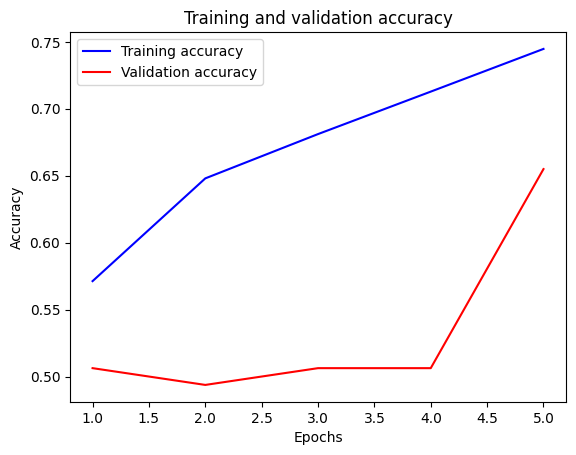

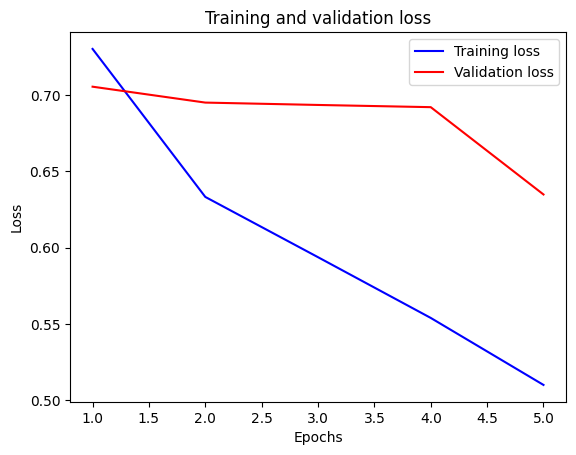

In [ ]:
# Plot training and validation accuracy on the same plot
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss on the same plot
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from keras.models import load_model

# Load the saved model
saved_model_path = "models/MobileNet_CatvsDog.h5"
loaded_model = load_model(saved_model_path)

# Evaluate the model on the test data
loss, accuracy = loaded_model.evaluate(X_test, y_test_one_hot, batch_size=128)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

40/40 [==============================] - 2s 28ms/step - loss: 0.6374 - accuracy: 0.6428
Test Loss: 0.6374254822731018
Test Accuracy: 0.6427860856056213
